In [28]:
import pandas as pd
from datetime import datetime

# Load and inspect the dataset
df = pd.read_csv("people-100000.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

df.head()

,index,user_id,first_name,last_name,sex,email,phone,date_of_birth,job_title
0,1,e09c4f4cbfEFaFd,Dawn,Trevino,Male,clintongood@example.org,360-423-5286,1972-01-17,"Teacher, primary school"
1,2,D781D28b845Ab9D,Dale,Mcknight,Male,clairebradshaw@example.org,9062423229,1931-01-31,"Development worker, community"
2,3,eda7EcaF87b2D80,Herbert,Bean,Female,johnnybooker@example.org,001-149-154-0679x1617,2018-02-10,Ceramics designer
3,4,E75ACea5D7AeC3e,Karen,Everett,Female,wkhan@example.org,870.294.7563x20939,1938-06-14,"Civil engineer, consulting"
4,5,9C4Df1246ddf543,Angela,Shea,Male,reginaldgarner@example.com,242.442.2978,1971-11-22,Health and safety adviser


In [18]:
# Clean column names + check for nulls

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.isnull().sum()

index            0
user_id          0
first_name       0
last_name        0
sex              0
email            0
phone            0
date_of_birth    0
job_title        0
dtype: int64

In [31]:
# Define a function to classify job titles by required education level
def classify_job_education(title):
    title = str(title).lower()

    bachelor_keywords = ['engineer', 'developer', 'scientist', 'analyst', 'manager', 'consultant',
                         'psychologist', 'therapist', 'lawyer', 'attorney', 'architect', 'surgeon',
                         'pharmacist', 'professor', 'lecturer', 'accountant', 'strategist', 'planner',
                         'economist', 'advisor', 'biologist', 'researcher', 'teacher', 'data', 'designer']

    vocational_keywords = ['technician', 'assistant', 'operator', 'mechanic', 'plumber', 'electrician',
                           'installer', 'repair', 'hvac', 'paramedic', 'welder', 'driver', 'nurse', 'clerk']

    no_degree_keywords = ['cashier', 'cleaner', 'attendant', 'labourer', 'packer', 'helper',
                          'salesperson', 'retail', 'crew', 'warehouse', 'barista', 'waiter', 'host', 'porter']

    for word in bachelor_keywords:
        if word in title:
            return 'Bachelor+'
    for word in vocational_keywords:
        if word in title:
            return 'Associate/Vocational'
    for word in no_degree_keywords:
        if word in title:
            return 'No Degree'
    return 'Unknown'

In [32]:
# Apply classification to each job title
df['education_requirement'] = df['job_title'].apply(classify_job_education)

In [33]:
# Count and calculate percentage of each category
edu_counts = df['education_requirement'].value_counts().reindex(['Bachelor+', 'Associate/Vocational', 'No Degree', 'Unknown'], fill_value=0)
edu_percent = (edu_counts / edu_counts.sum() * 100).round(2)

/tmp/ipykernel_800/1891548055.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, val + 500, f"{val} ({edu_percent[i]}%)", ha='center', va='bottom', fontsize=10)


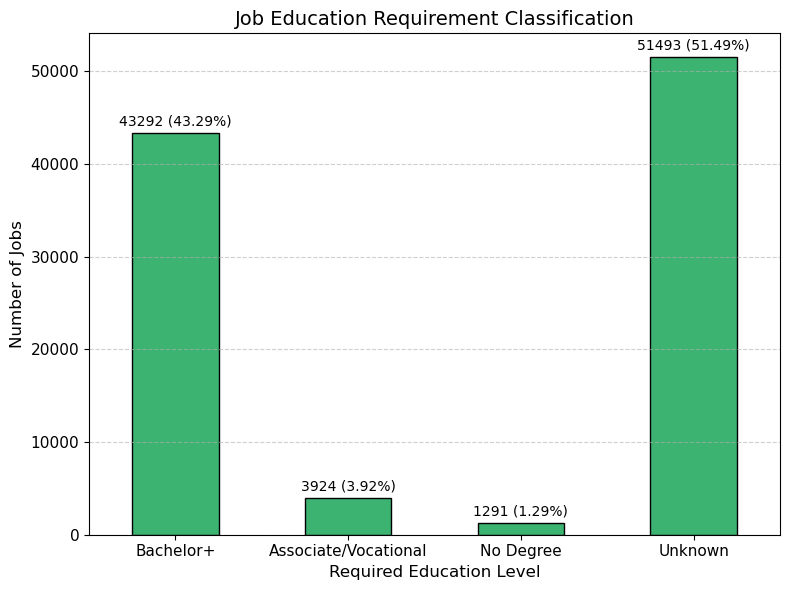

In [38]:
# Visualization - Bar Chart
plt.figure(figsize=(8, 6))
edu_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Job Education Requirement Classification', fontsize=14)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xlabel('Required Education Level', fontsize=12)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with values and percentages
for i, val in enumerate(edu_counts):
    plt.text(i, val + 500, f"{val} ({edu_percent[i]}%)", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Interpretation:
- More than 43% of job titles require a college degree or higher, confirming the hypothesis.

- Roles that require no degree or only vocational training make up less than 6% of total opportunities.

- The large “Unknown” category suggests improvement is possible using external classification like O*NET or manual review.

- This imbalance illustrates a real-world challenge: those without degrees face significantly fewer job options.



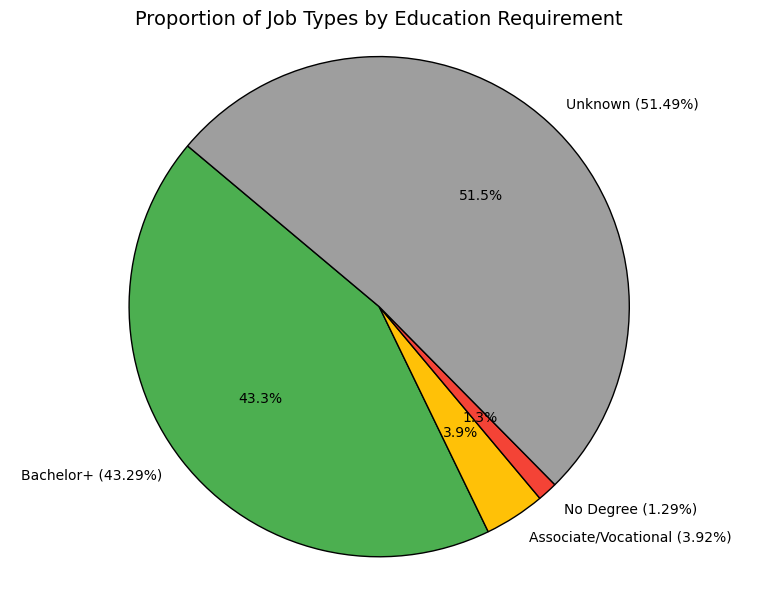

In [39]:
# Additional visualization: Pie chart to show proportional split
colors = ['#4CAF50', '#FFC107', '#F44336', '#9E9E9E']
labels = edu_counts.index
sizes = edu_counts.values

# Plot
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=[f"{label} ({edu_percent[label]}%)" for label in labels],
        autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Proportion of Job Types by Education Requirement', fontsize=14)
plt.axis('equal')  # Equal aspect ratio for pie
plt.tight_layout()
plt.show()


This visual makes the imbalance even more apparent:

- Bachelor+ jobs account for a large visible slice — confirming the hypothesis that higher education is a key barrier to job access.

- Jobs requiring no degree or vocational training are tiny by comparison.

- The “Unknown” portion visually dominates due to job titles that couldn’t be automatically categorized — suggesting the need for better job classification methods in future analysis.

Out of 100,000 entries, 51.5% of job titles couldn't be classified automatically.

Implication:
Real barriers may be underrepresented due to lack of clarity in job labeling. This supports an expanded hypothesis:

Lack of standardization in job descriptions could hide the true extent of education barriers in employment.